In [1]:
#Q1
class City:
    def __init__(self,code,name,region,population,latitude,longitude): #build the constructor
        self.code=code
        self.name=name
        self.region=region
        self.population=population
        self.latitude=latitude
        self.longitude=longitude
    
    def __str__(self): #return the string with commas
        return self.name+","+str(self.population)+","+str(self.latitude)+","+str(self.longitude)
    
    def get_population(self): #get the population
        return self.population
    
    def get_latitude(self): #get the latitude
        return self.latitude
    
    def get_name(self): #get the name
        return self.name

In [2]:
#Q2
file=open("world_cities.txt","r") #open the file
built_list=[] #build an empty list
for line in file:
    line=line.split(",") #split the line
    built_list=built_list+[City(line[0],line[1],line[2],int(line[3]),float(line[4]),float(line[5]))] #add content in the line to the list

In [3]:
# Performs the quicksort algorithm.

# Partition the sublist the_list[p ... r] so that the pivot
# (originally in the_list[r]) moves to the_list[q],
# all items in the_list[p ... q-1] are less than or equal to the pivot,
# and all items in the_list[q+1 ... r] are greater than the pivot.
# Return the index q where the pivot ends up.
def partition(the_list, p, r, compare_func):
    pivot = the_list[r]
    
    # Set up the indices i and j so that
    #    the_list[p ... i] contains items <= pivot,
    #    the_list[i+1 ... j-1] contains items > pivot, and
    #    the_list[j ... r-1] contains items not yet compared with the pivot.
    i = p - 1
    j = p
    while j < r:
        if compare_func(the_list[j], pivot):
            # Move this item into the section known to be <= pivot.
            i += 1
            (the_list[i], the_list[j]) = (the_list[j], the_list[i])
        j += 1
            
    # Get the pivot into the correct position.
    (the_list[i+1], the_list[r]) = (the_list[r], the_list[i+1])
    return i+1

# Sort the sublist the_list[p ... r] using the quicksort algorithm.
def quicksort(the_list, p, r, compare_func):
    if p < r:   # nothing to do if the sublist has fewer than 2 items
        q = partition(the_list, p, r, compare_func) # divide
        quicksort(the_list, p, q-1, compare_func)   # conquer smaller items
        quicksort(the_list, q+1, r, compare_func)   # conquer larger items

# Sort the_list by running quicksort on it.        
def sort(the_list, compare_func):
    quicksort(the_list, 0, len(the_list)-1, compare_func)

# Return True if city1 has the same or higher population than city2.
def compare_population(city1, city2):
    return city1.get_population() >= city2.get_population()

# Return True if city1 comes at or before city2 alphabetically.
def compare_name(city1, city2):
    return city1.get_name().lower() <= city2.get_name().lower()

# Return True if city1's latitude is less than or equal to city2's latitude.
def compare_latitude(city1, city2):
    return city1.get_latitude() <= city2.get_latitude()

In [4]:
#Q3.1
sort(built_list, compare_name) #sort the built_list by cities' names
output_file1 = open("cities_alpha.txt", "w") #create the new file
for i in range(len(built_list)):
    output_file1.write(str(built_list[i])+"\n") #add the sorted built_list to the file
    
output_file1.close() #close the file

In [5]:
#Q3.2
sort(built_list, compare_population) #sort the built_list by population
output_file2 = open("cities_population.txt", "w") #create the new file
for i in range(len(built_list)):
    output_file2.write(str(built_list[i])+"\n") #add the sorted built_list to the file
    
output_file2.close() #close the file

In [6]:
#Q3.3
sort(built_list, compare_latitude) #sort the built_list by latitude
output_file3 = open("cities_latitude.txt", "w") #create the new file
for i in range(len(built_list)):
    output_file3.write(str(built_list[i])+"\n") #add the sorted built_list to the file
    
output_file3.close() #close the file

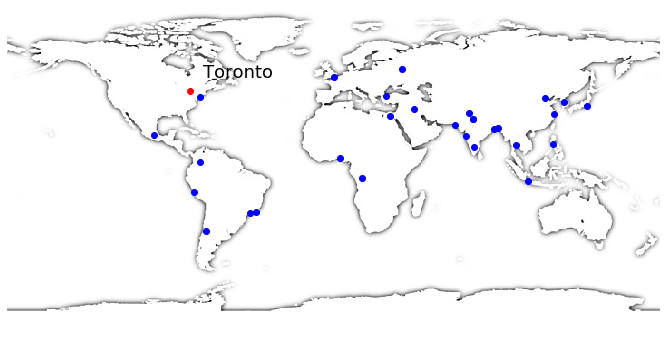

In [11]:
#Q4
import matplotlib.pyplot as plt
import time
import IPython.display as display


WIDTH = 720 # image (world.png) width
HEIGHT = 360 # image height
DPI = 60 # display image at this dots-per-inch resolution

# Convert a latitude and longitude to pixel locations.
# WIDTH & HEIGHT should be defined to be the size of the image (in pixels)
def longlat_to_pixel(latitude, longitude):
    center_x = int(round((WIDTH / 2) + (WIDTH / 2) * (longitude / 180)))
    center_y = HEIGHT - int(round((HEIGHT / 2) + (HEIGHT / 2) * (latitude / 90)))
    return (center_x, center_y)

#create a list only with cities' name, latitude, longitude
file2=open("cities_population.txt","r") 
population_list=[] 
for line in file2:
    line=line.split(",") 
    population_list=population_list+[(line[0],float(line[2]),float(line[3]))] 

#create a list of cities latitude and longitude in pixel
pixel_list=[]
for i in range(0,30):
    pixel_list=pixel_list+[longlat_to_pixel(population_list[i][1],population_list[i][2])]

for j in range(0,30):
    img = plt.imread("world.jpg")
    plt.figure(figsize=(WIDTH/DPI,HEIGHT/DPI))
    plt.imshow(img) # Display the image
    plt.axis('off')
    plt.plot(pixel_list[j][0],pixel_list[j][1],'ro') #draw the red dots for each city
    plt.text(pixel_list[j][0]+15,pixel_list[j][1]-15,str(population_list[j][0]),fontsize=18) #draw the city' name
    for k in range(0,j):
        plt.plot(pixel_list[k][0],pixel_list[k][1],'bo') #draw red dots for the first j cities
    time.sleep(0.5)
    display.clear_output(wait=True)
    plt.show()